# Flood Adaptation: Minimal Model

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py`
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is random since the main aim of this model is to study effectiveness of communication. The decision by each household to adapt is based on their appraisal of risks and apparaisal of coping ability. This is based on the Protection Motivation Theory (Rogers, 1983; Bubeck et al., 2012).

The current implementation includes several simplifications and educated choices considering the time resources for this project. We made assumptions transparent.

# The Model

Government agent is in the schedule.


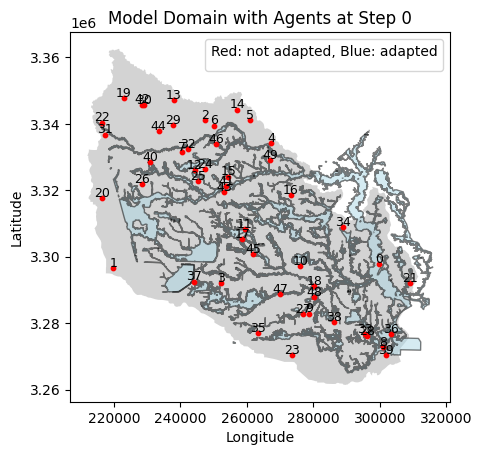

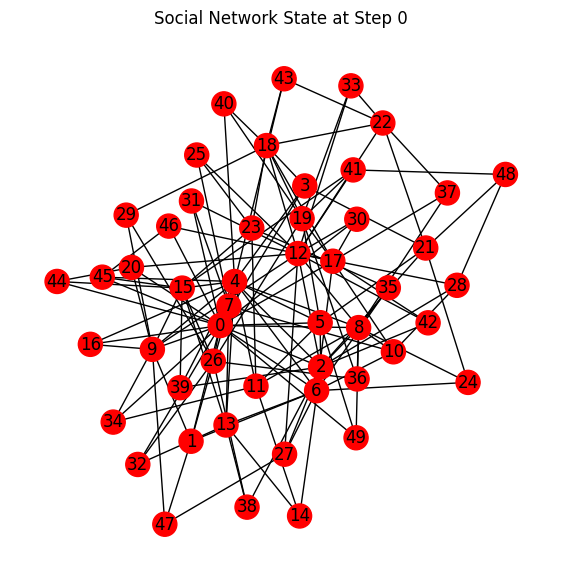

Average appraisal is less than 0.2
Agent 0 total individual appraisal: 0


ZeroDivisionError: float division by zero

In [8]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Import the agent class(es) from agents.py
from agents import Households
from agents import Government

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="barabasi_albert") # flood_map_choice can be "harvey", "100yr", or "500yr"
# The social network structure that is used.
# Can currently be "erdos_renyi", "barabasi_albert", "watts_strogatz", or "no_network"
# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents if isinstance(agent, Households)]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   3.898749              0.885870          0.000000   
     1                   0.269079              0.419094          0.000000   
     2                   2.155391              0.782388          0.000000   
     3                   0.688270              0.583074          0.000000   
     4                   0.287369              0.430576          0.000000   
...                           ...                   ...               ...   
49   46                  0.000000              0.000000          0.000000   
     47                  1.275459              0.690781          1.341787   
     48                  0.342964              0.461455          0.215286   
     49                  0.000000              0.000000          0.000000   
     51                       NaN                   NaN               NaN   

              FloodDamageActual IsAdapted  \
Step AgentID                                
0    0                 0.000000     False   
     1                 0.000000     False   
     2                 0.000000     False   
     3                 0.000000     False   
     4                 0.000000     False   
...                         ...       ...   
49   46                0.000000     False   
     47                0.699633      True   
     48                0.380151      True   
     49                0.000000     False   
     51                     NaN      None   

                                                   location  
Step AgentID                                                 
0    0         POINT (307203.80856630957 3278015.022441469)  
     1          POINT (301272.7964710006 3284736.733202057)  
     2        POINT (299045.86295584537 3302358.3115118584)  
     3         POINT (290363.3870944346 3300167.4814994545)  
     4          POINT (219860.6584447112 3360227.270592597)  
...                                                     ...  
49   46       POINT (245655.15507250934 3308313.1161518265)  
     47         POINT (252195.6243523865 3286689.449169024)  
     48        POINT (221396.20115106265 3334384.902440266)  
     49       POINT (217800.48920637986 3314185.7634028257)  
     51                                                None  

[2550 rows x 6 columns]

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households
0,0
1,9
2,31
3,38
4,39
5,39
6,39
7,39
8,39
9,39
